In [207]:
import pySPM
print(pySPM.__version__)

0.4.0


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import scipy.signal

import os
from IPython import display

In [255]:
sxm_file_path = "P:/SFEM Data/SFEM/2023/2023-11-17/Si(111)_012.sxm"

In [256]:
sxm_data = pySPM.SXM(sxm_file_path)

In [236]:
sxm_data.list_channels()

Channels
  - Z
  - Tip_Current
  - BBX
  - CLAM__2
  - Bias
  - Current


In [237]:
# Access information about the scan direction
scan_direction = sxm_data.header.get("scan_direction", None)

if scan_direction is not None:
    print(f"Scan Direction: {scan_direction}")
else:
    print("Scan direction information not found.")

Scan direction information not found.


In [238]:
Bias = sxm_data.get_channel("Bias")
Topo = sxm_data.get_channel("Z")
Current = sxm_data.get_channel("Current")
T_Current = sxm_data.get_channel("Tip_Current")

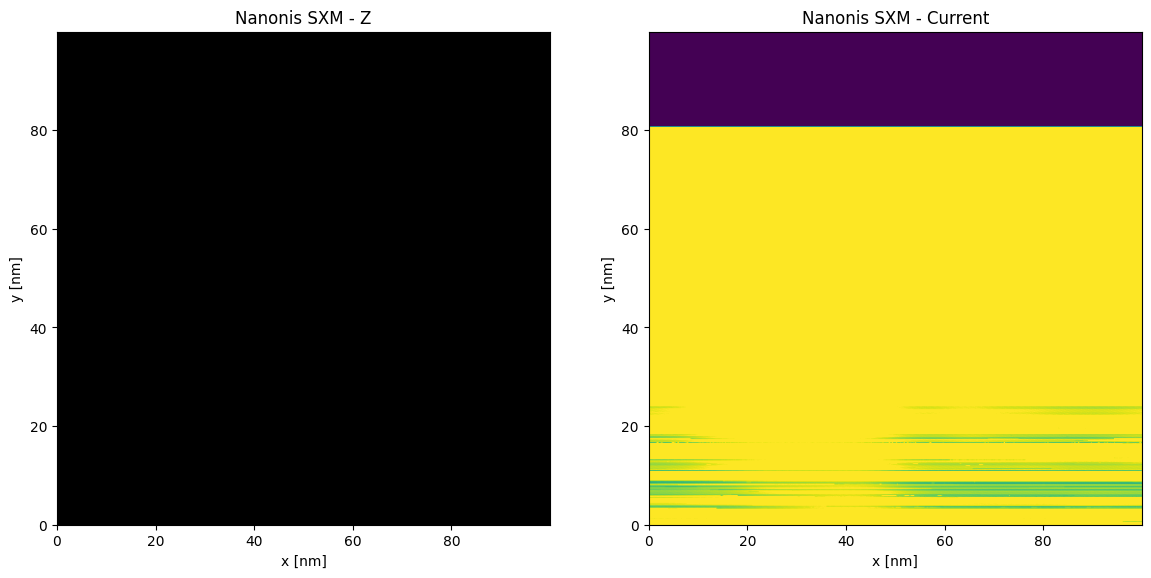

In [239]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
Topo.show(ax=ax[0]);
C_plot = Current.show(ax=ax[1], cmap='viridis');

In [240]:
#Topo.pixels

Data Correction

In [241]:
Topo_Lines = Topo.correct_lines(inline=False)
Topo_Plane = Topo.correct_plane(inline=False)

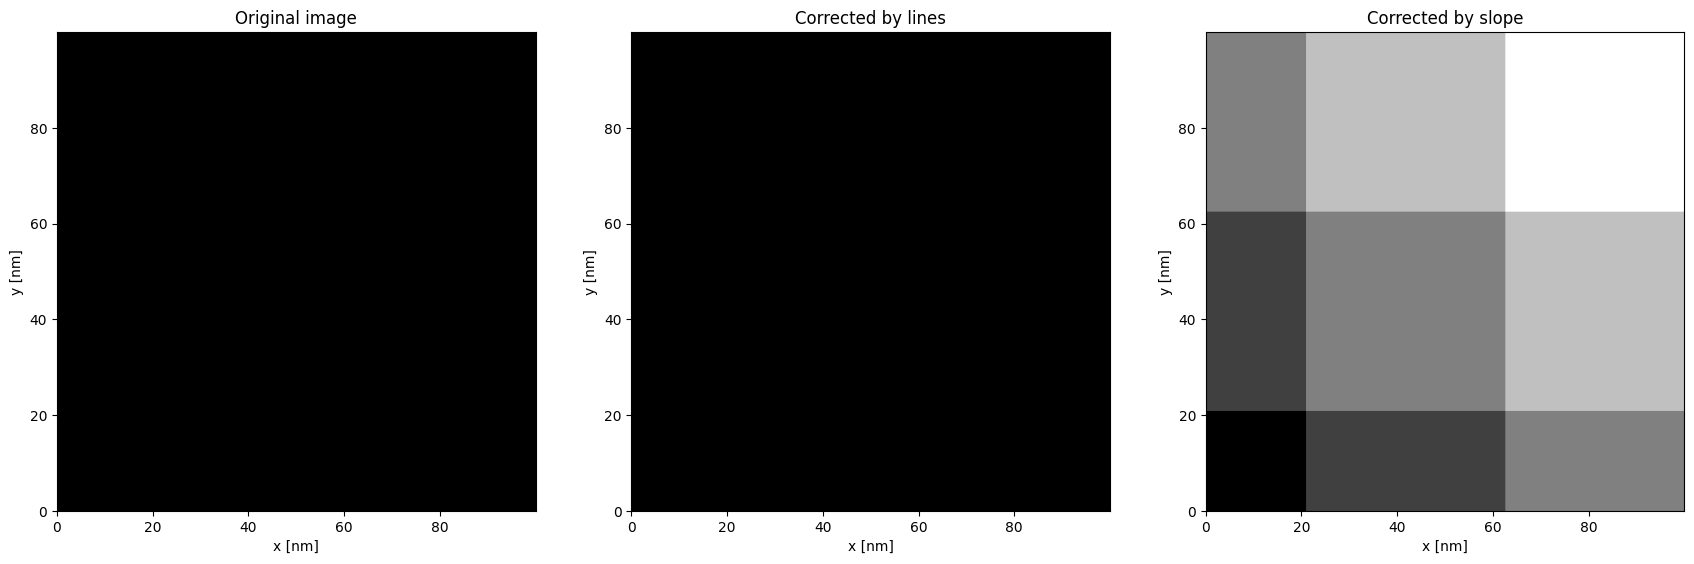

In [242]:
fig, ax = plt.subplots(1,3,figsize=(21, 7))
Topo.show(ax=ax[0], cmap='afmhot')
ax[0].set_title("Original image")
Topo_Lines.show(ax=ax[1], cmap='afmhot')
ax[1].set_title("Corrected by lines")
Topo_Plane.show(ax=ax[2], cmap='grey')
ax[2].set_title("Corrected by slope");

Median of differences

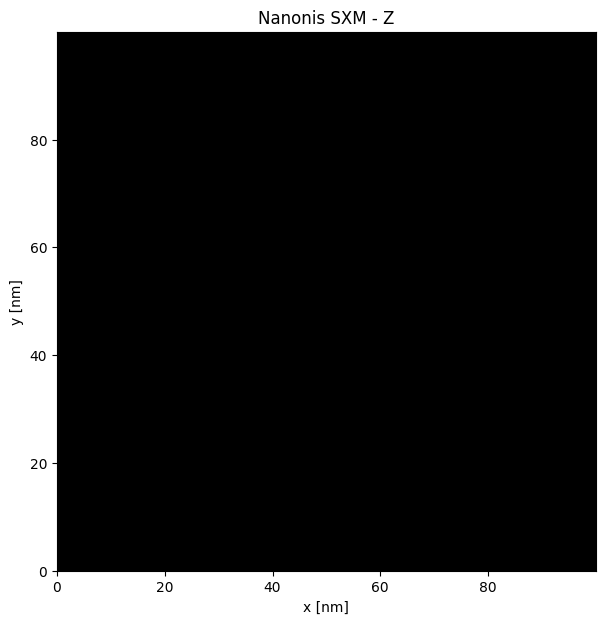

In [243]:
fig = plt.figure(figsize=(7,7))
import copy
MofD = copy.deepcopy(Topo) # make deepcopy of object otherwise you will just change the original
MofD.correct_median_diff()
MofD.show(cmap="afmhot");

Scars removal 


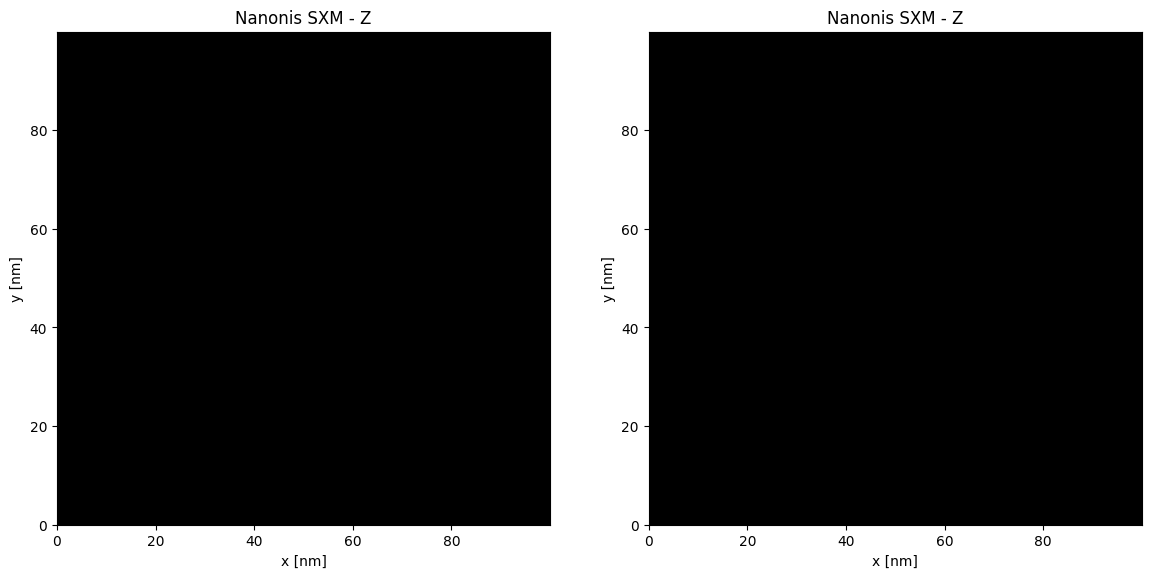

In [244]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

topoC = Topo_Lines.filter_scars_removal(.7,inline=False)
Topo_Lines.show(ax=ax[0]);
topoC.show(ax=ax[1],cmap="afmhot");


Flatten along path

A better way to correct the data is by defining pathes that are known to be flat and each line will be offseted automatically in order to get the defines lines as flat as possible. First let's display the data with the pixel values in the axis instead of the real size. The pixels coordinated will be used to define the path.
[x1,y1,x2,y2] 

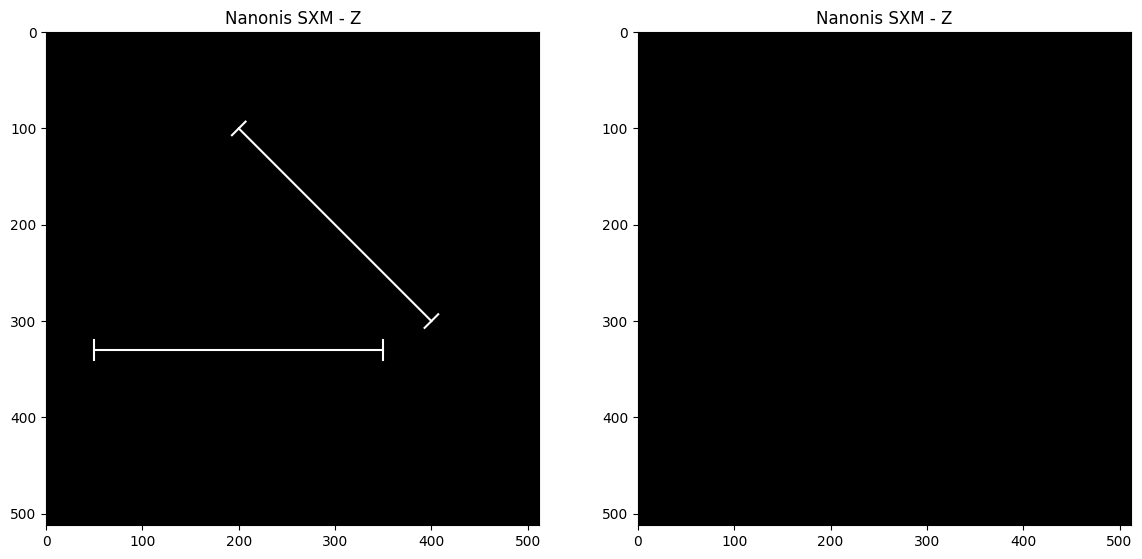

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

Topo_Path = Topo_Lines.filter_scars_removal(inline=False)
Topo_Path.offset([
     [200,100,400,300],
     [50,330,350,330]],

             ax=ax[0], width=20,  axPixels=True)
Topo_Lines.show(ax=ax[0], pixels=True, cmap='afmhot')
Topo_Path.show(ax=ax[1], pixels=True, cmap='afmhot') 

CLAM and SFEM work 

In [254]:
sxm_data.list_channels()

Channels
  - Z
  - Tip_Current
  - BBX
  - CLAM__2
  - Bias
  - Current


In [247]:
CLAM = sxm_data.get_channel("CLAM__2")

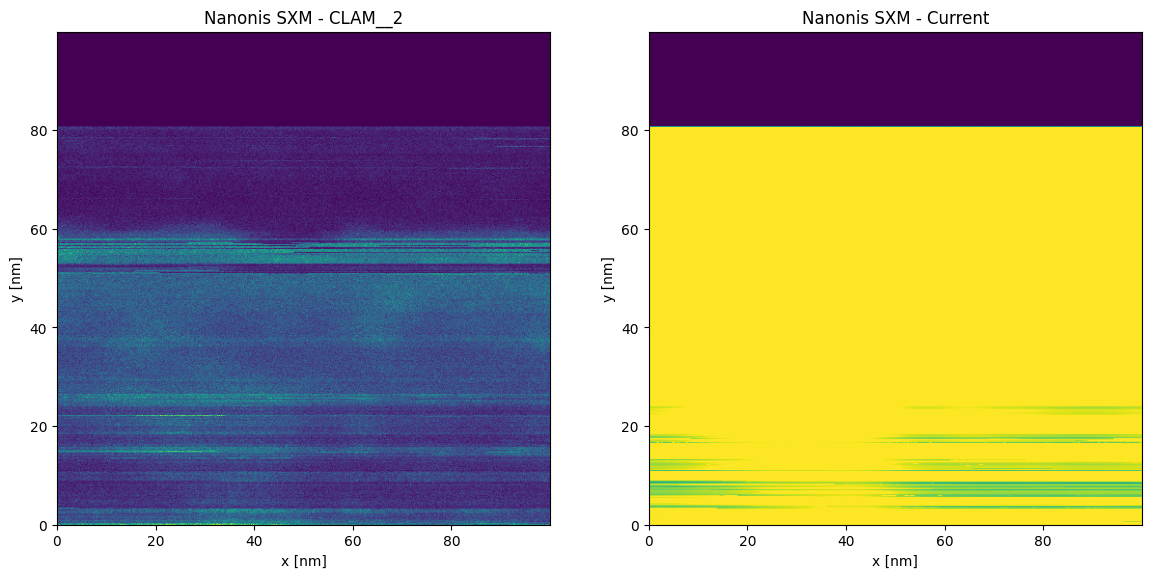

In [248]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
CLAM.show(ax=ax[0], cmap='viridis');
C_plot = Current.show(ax=ax[1], cmap='viridis');

In [249]:
CLAM_Lines = CLAM.correct_lines(inline=False)
CLAM_Plane = CLAM.correct_plane(inline=False)

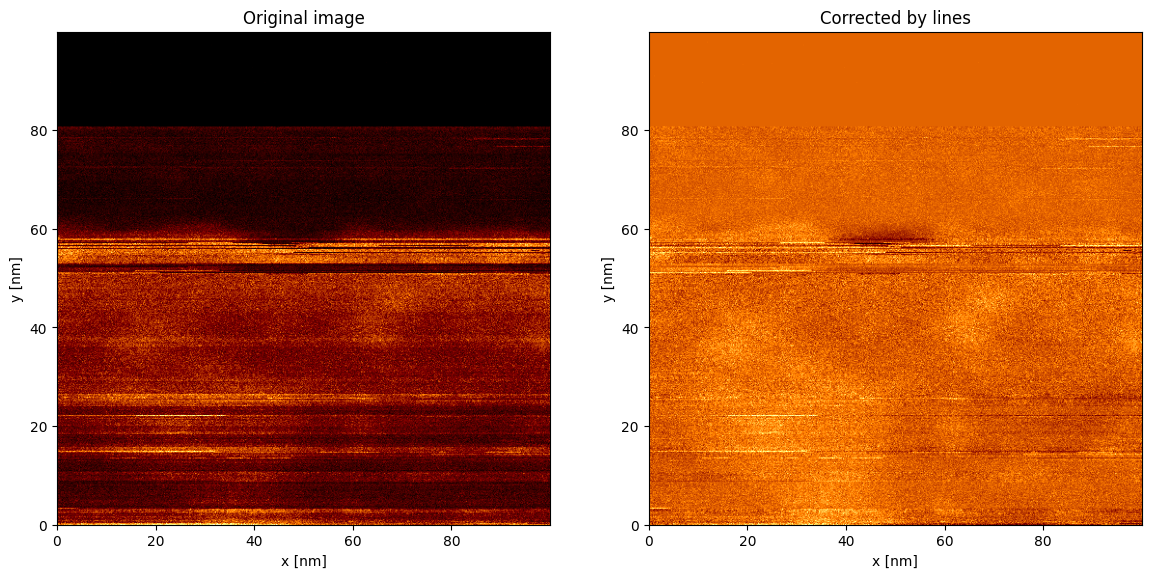

In [250]:
fig, ax = plt.subplots(1,2,figsize=(14, 7))
CLAM.show(ax=ax[0], cmap='afmhot')
ax[0].set_title("Original image")
CLAM_Lines.show(ax=ax[1], cmap='afmhot')
ax[1].set_title("Corrected by lines");

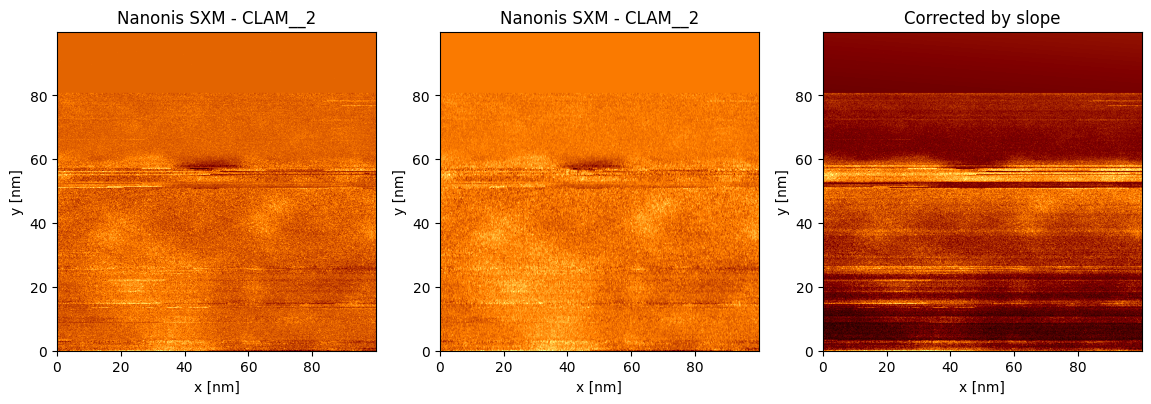

In [251]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

CLAM_Scar = CLAM_Lines.filter_scars_removal(.7,inline=False)
CLAM_Lines.show(ax=ax[0],cmap="afmhot");
CLAM_Scar.show(ax=ax[1],cmap="afmhot");
CLAM_Plane.show(ax=ax[2], cmap='afmhot')
ax[2].set_title("Corrected by slope");

In [252]:
#CLAM_Scar.pixels

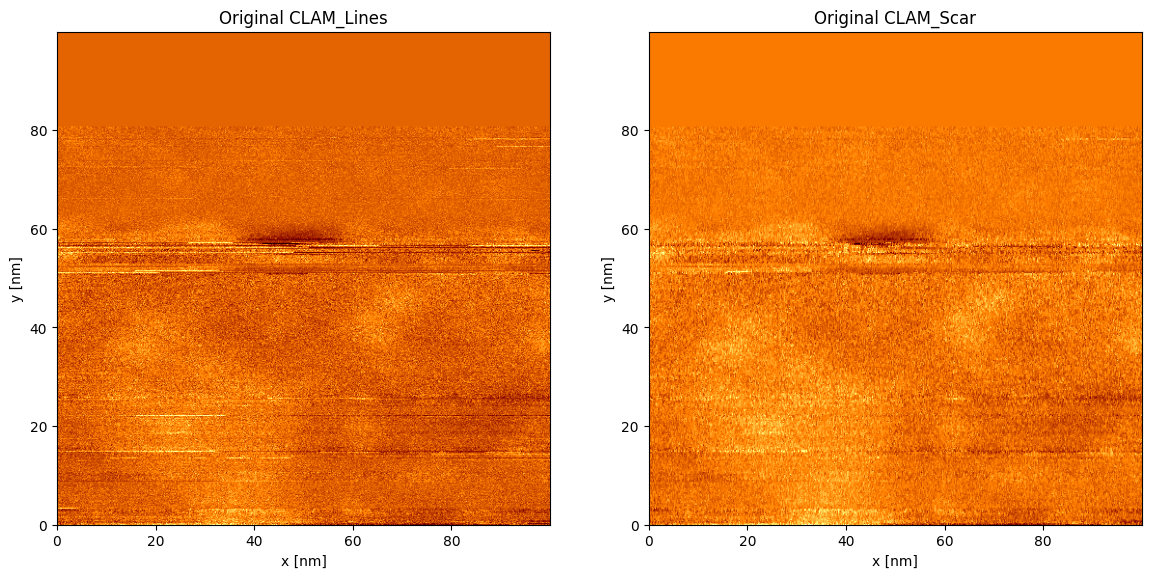

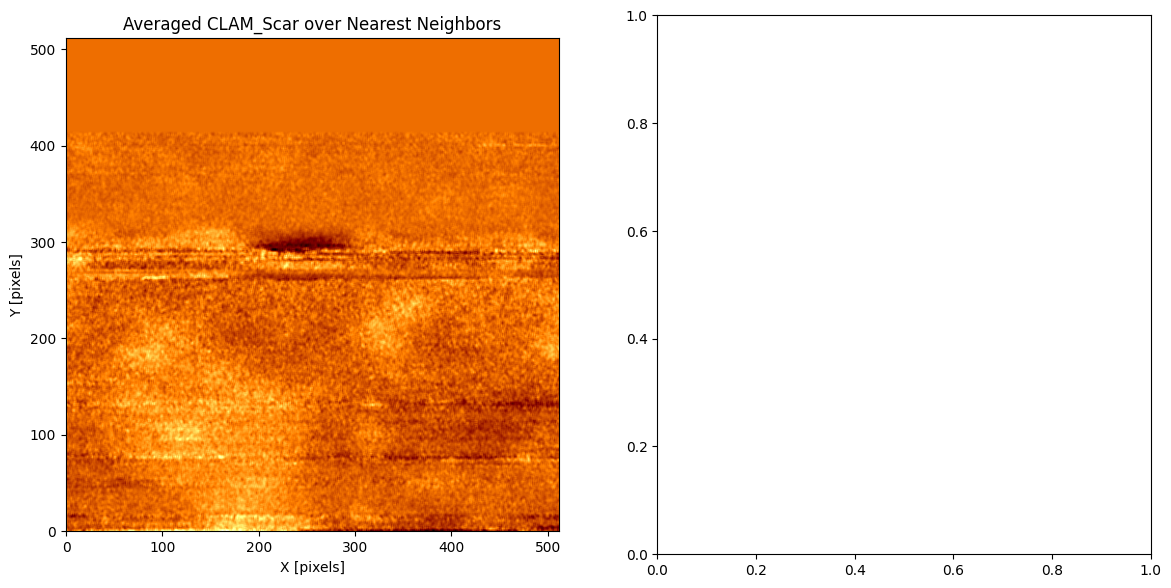

In [253]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

CLAM_Scar = CLAM_Lines.filter_scars_removal(.7, inline=False)
CLAM_Lines.show(ax=ax[0], cmap="afmhot")
ax[0].set_title("Original CLAM_Lines")

# Function to average over the first nearest neighbor pixels
def average_nearest_neighbors(data):
    # Ensure the data is a 2D array
    if len(data.shape) != 2:
        raise ValueError("Input data must be a 2D array")

    # Define a 3x3 kernel for averaging
    kernel = np.ones((3, 3), dtype=float)
    kernel /= kernel.sum()

    # Use convolution to perform local averaging
    averaged_data = scipy.signal.convolve2d(data, kernel, mode='same', boundary='symm')

    return averaged_data

# Average over the first nearest neighbor pixels
averaged_CLAM_Scar = average_nearest_neighbors(CLAM_Scar.pixels)

CLAM_Scar.show(ax=ax[1], cmap="afmhot")
ax[1].set_title("Original CLAM_Scar")

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].imshow(averaged_CLAM_Scar, cmap="afmhot", origin='lower') #,extent=[0,100,0,100])
ax[0].set_title("Averaged CLAM_Scar over Nearest Neighbors")
ax[0].set_xlabel("X [pixels]")
ax[0].set_ylabel("Y [pixels]")
plt.show()
